In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import mysql.connector

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [5]:
conn = mysql.connector.connect(user='root', password='admin',
                              host='localhost', database='marketops',
                              auth_plugin='mysql_native_password')

In [52]:
myCursor = conn.cursor()

In [53]:
myCursor.execute("select V.ID,VSP.CURRENT_PRICE,VSP.OPENING,VSP.HIGH,VSP.LOW,VSP.CLOSING,VSP.VOLUME,\
                 VSP.SNAPSHOT_TIME,VFD.PREV_CLOSING,VFD.DAY_CHANGE,VFD.P_52_WEEK_RANGE,VFD.MARKET_CAP\
                 from vendor V inner join vendor_stock_price VSP on V.ID = VSP.VENDOR_ID \
                 inner join vendor_product_category VPC on VSP.VENDOR_ID = VPC.VENDOR_ID \
                 inner join vendor_financials_daily VFD on VPC.VENDOR_ID = VFD.VENDOR_ID \
                 where (VSP.CLOSING is not null) and V.ID = 2127 \
                 group by V.ID,VSP.CURRENT_PRICE,VSP.OPENING,VSP.HIGH,VSP.LOW,VSP.CLOSING,\
                 VSP.VOLUME,VSP.SNAPSHOT_TIME,VFD.PREV_CLOSING,VFD.DAY_CHANGE,VFD.P_52_WEEK_RANGE,VFD.MARKET_CAP")

vendor_stock_price_data = myCursor.fetchall()
vendor_stock_price_df = pd.DataFrame(vendor_stock_price_data)

column_names = [i[0] for i in myCursor.description]

vendor_stock_price_df.columns = column_names

In [54]:
len(vendor_stock_price_df)

4464

In [55]:
vendor_stock_price_df.to_csv("stock_price.csv")

In [10]:
vendor_stock_price_df.columns

Index(['ID', 'CURRENT_PRICE', 'OPENING', 'HIGH', 'LOW', 'CLOSING', 'VOLUME', 'SNAPSHOT_TIME', 'PREV_CLOSING', 'DAY_CHANGE', 'P_52_WEEK_RANGE', 'MARKET_CAP'], dtype='object')

In [11]:
vendor_stock_price_df.head()

,ID,CURRENT_PRICE,OPENING,HIGH,LOW,CLOSING,VOLUME,SNAPSHOT_TIME,PREV_CLOSING,DAY_CHANGE,P_52_WEEK_RANGE,MARKET_CAP
0,2127,21.710,21.860,21.920,21.310,21.710,1360500,2012-03-30,34.980,+0.15,17.75%,5860000000.0000000000
1,2127,21.700,21.310,21.800,21.270,21.700,1225300,2012-03-29,34.980,+0.15,17.75%,5860000000.0000000000
2,2127,21.540,21.600,21.980,21.300,21.540,1206200,2012-03-28,34.980,+0.15,17.75%,5860000000.0000000000
3,2127,21.620,21.460,22.190,21.400,21.620,2199000,2012-03-27,34.980,+0.15,17.75%,5860000000.0000000000
4,2127,21.410,21.140,21.420,21.080,21.410,682900,2012-03-26,34.980,+0.15,17.75%,5860000000.0000000000


In [12]:
vendor_stock_price_df["CURRENT_PRICE"] = [float(row) for row in vendor_stock_price_df["CURRENT_PRICE"]]

In [13]:
vendor_stock_price_df["OPENING"] = [float(row) for row in vendor_stock_price_df["OPENING"]]

In [14]:
vendor_stock_price_df["HIGH"] = [float(row) for row in vendor_stock_price_df["HIGH"]]

In [15]:
vendor_stock_price_df["LOW"] = [float(row) for row in vendor_stock_price_df["LOW"]]

In [16]:
vendor_stock_price_df["CLOSING"] = [float(row) for row in vendor_stock_price_df["CLOSING"]]

In [17]:
vendor_stock_price_df["PREV_CLOSING"] = [float(row) for row in vendor_stock_price_df["PREV_CLOSING"]]

In [18]:
vendor_stock_price_df['MARKET_CAP'] = pd.Series(vendor_stock_price_df['MARKET_CAP'], dtype = "int64")

In [19]:
vendor_stock_price_df.head()

,ID,CURRENT_PRICE,OPENING,HIGH,LOW,CLOSING,VOLUME,SNAPSHOT_TIME,PREV_CLOSING,DAY_CHANGE,P_52_WEEK_RANGE,MARKET_CAP
0,2127,21.71,21.86,21.92,21.31,21.71,1360500,2012-03-30,34.98,+0.15,17.75%,5860000000
1,2127,21.70,21.31,21.80,21.27,21.70,1225300,2012-03-29,34.98,+0.15,17.75%,5860000000
2,2127,21.54,21.60,21.98,21.30,21.54,1206200,2012-03-28,34.98,+0.15,17.75%,5860000000
3,2127,21.62,21.46,22.19,21.40,21.62,2199000,2012-03-27,34.98,+0.15,17.75%,5860000000
4,2127,21.41,21.14,21.42,21.08,21.41,682900,2012-03-26,34.98,+0.15,17.75%,5860000000


In [20]:
vendor_stock_price_df["DAY_CHANGE"] = [float(row) for row in vendor_stock_price_df["DAY_CHANGE"]]

In [21]:
vendor_stock_price_df["P_52_WEEK_RANGE"] = [float(row.replace("%","")) for row in vendor_stock_price_df["P_52_WEEK_RANGE"]]

In [22]:
vendor_stock_price_df.dtypes

ID                          int64
CURRENT_PRICE             float64
OPENING                   float64
HIGH                      float64
LOW                       float64
CLOSING                   float64
VOLUME                      int64
SNAPSHOT_TIME      datetime64[ns]
PREV_CLOSING              float64
DAY_CHANGE                float64
P_52_WEEK_RANGE           float64
MARKET_CAP                  int64
dtype: object

In [23]:
len(vendor_stock_price_df[vendor_stock_price_df['CURRENT_PRICE'] - vendor_stock_price_df['CLOSING'] == 0])

4464

In [24]:
vendor_stock_price_df =vendor_stock_price_df.sort_values(by=['SNAPSHOT_TIME'])

In [25]:
max_index = vendor_stock_price_df.shape[0]-1

In [26]:
numbers = max_index*80//100

In [27]:
train_indexs = np.linspace(start=0, stop=numbers, num=numbers, dtype=int)

In [28]:
test_indexs = np.linspace(start=numbers+1, stop=max_index+1, num=(max_index-numbers)+1, dtype=int)

In [29]:
train_df = vendor_stock_price_df.loc[train_indexs]
train_df =train_df.sort_values(by=['SNAPSHOT_TIME'])

In [30]:
test_df = vendor_stock_price_df.loc[test_indexs]
test_df =test_df.sort_values(by=['SNAPSHOT_TIME'])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [31]:
train_df.head()

,ID,CURRENT_PRICE,OPENING,HIGH,LOW,CLOSING,VOLUME,SNAPSHOT_TIME,PREV_CLOSING,DAY_CHANGE,P_52_WEEK_RANGE,MARKET_CAP
3409,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.86,-1.34,34.65,5920000000
2293,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.65,0.23,38.80,6150000000
61,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,34.98,0.15,17.75,5860000000
1735,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.55,0.10,38.56,6110000000
2851,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.88,-0.02,38.73,6140000000


In [32]:
train_df.index = range(0,len(train_df))

In [33]:
train_df.head()

,ID,CURRENT_PRICE,OPENING,HIGH,LOW,CLOSING,VOLUME,SNAPSHOT_TIME,PREV_CLOSING,DAY_CHANGE,P_52_WEEK_RANGE,MARKET_CAP
0,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.86,-1.34,34.65,5920000000
1,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.65,0.23,38.80,6150000000
2,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,34.98,0.15,17.75,5860000000
3,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.55,0.10,38.56,6110000000
4,2127,16.85,16.8,17.12,16.62,16.85,1382800,2012-01-03,36.88,-0.02,38.73,6140000000


In [34]:
train_df.dtypes

ID                          int64
CURRENT_PRICE             float64
OPENING                   float64
HIGH                      float64
LOW                       float64
CLOSING                   float64
VOLUME                      int64
SNAPSHOT_TIME      datetime64[ns]
PREV_CLOSING              float64
DAY_CHANGE                float64
P_52_WEEK_RANGE           float64
MARKET_CAP                  int64
dtype: object

In [35]:
test_df.index = range(0,len(test_df))

In [36]:
test_df.head()

,ID,CURRENT_PRICE,OPENING,HIGH,LOW,CLOSING,VOLUME,SNAPSHOT_TIME,PREV_CLOSING,DAY_CHANGE,P_52_WEEK_RANGE,MARKET_CAP
0,2127.0,16.85,16.80,17.12,16.62,16.85,1382800.0,2012-01-03,36.86,-1.34,31.36,5.920000e+09
1,2127.0,16.78,16.77,16.89,16.63,16.78,780100.0,2012-01-04,36.86,-1.34,31.36,5.920000e+09
2,2127.0,16.71,16.76,16.80,16.49,16.71,757900.0,2012-01-05,36.86,-1.34,31.36,5.920000e+09
3,2127.0,16.68,16.76,16.85,16.60,16.68,490300.0,2012-01-06,36.86,-1.34,31.36,5.920000e+09
4,2127.0,16.71,16.66,16.83,16.50,16.71,700600.0,2012-01-09,36.86,-1.34,31.36,5.920000e+09


C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


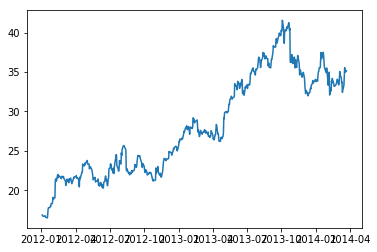

In [37]:
plt.plot(train_df['SNAPSHOT_TIME'],train_df['CLOSING'])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_Train = train_df[['OPENING','HIGH','LOW','VOLUME','PREV_CLOSING','DAY_CHANGE','MARKET_CAP','P_52_WEEK_RANGE']]
y_Train = train_df['CLOSING']
X_scaling = StandardScaler()
y_scaling = StandardScaler()

In [39]:
#y_Train = pd.DataFrame(y_Train)
type(y_Train.values)

numpy.ndarray

In [40]:
X_Train = X_scaling.fit_transform(X_Train)
y_Train = y_scaling.fit_transform(y_Train.values.reshape(-1, 1))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
reg = LinearRegression()
reg.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_pred = reg.predict(X_Train)

In [43]:
print(y_pred)

[[-1.6995738 ]
 [-1.69921254]
 [-1.69920732]
 ...
 [ 1.14883994]
 [ 1.14880332]
 [ 1.14891488]]


In [44]:
from sklearn.metrics import r2_score
r2_score(y_Train, y_pred)

0.9993169774353208

In [45]:
import pickle

In [47]:
pickle_out = open("marketOpsPickle.pkl","wb")
pickle.dump(y_pred, pickle_out)
pickle_out.close()